In [22]:
Bio_list = ["Staying fit and eating healthy are essential parts of my daily routine.", "I enjoy going to the gym and lifting weights regularly.",
            "I’m a fitness enthusiast who loves trying out different workout regimes.", "Running marathons and participating in triathlons are my fitness goals.",
            "Yoga and meditation are key practices that keep me grounded.", "I follow a strict meal plan to maintain a balanced and healthy lifestyle.",
            "I love researching the latest health trends and incorporating them into my routine.", "CrossFit training is something I’m passionate about for both mental and physical strength.",
            "I’m always looking for new ways to improve my fitness and well-being.", "My mornings start with a workout, whether it’s cycling or weight training.",
            "I’m a software developer with a passion for AI and machine learning.", "Coding is my daily hobby, and I love building apps in my free time.",
            "I enjoy working on open-source projects and collaborating with the tech community.", "I specialize in full-stack development and have a strong interest in cloud computing.",
            "Learning new programming languages and frameworks is my top priority.", "I enjoy experimenting with machine learning algorithms and neural networks.",
            "As a backend engineer, I love solving complex infrastructure challenges.", "I spend most of my free time contributing to tech forums and coding challenges.",
            "Building scalable applications using modern technologies excites me the most.", "I’m always learning new ways to optimize code and improve performance.",
            "I love hiking in the mountains and exploring new trails.", "Traveling to remote locations is my favorite hobby.",
            "Adventure sports like rock climbing and rafting are my passion.", "I enjoy backpacking through different countries and experiencing new cultures.",
            "Exploring nature reserves and wildlife parks is always on my travel list.", "I’m passionate about finding off-the-beaten-path destinations for travel.",
            "I frequently take weekend trips to national parks and hiking spots.", "Climbing mountains and visiting hidden beaches are what I live for.",
            "I’m always planning my next adventure trip to explore somewhere new.", "Traveling to new places and trying outdoor sports keeps me excited."]

In [23]:
texts = [word.split(' ') for word in Bio_list]
texts[0]

['Staying',
 'fit',
 'and',
 'eating',
 'healthy',
 'are',
 'essential',
 'parts',
 'of',
 'my',
 'daily',
 'routine.']

In [17]:
from gensim.models import FastText, Word2Vec
from sentence_transformers import SentenceTransformer
from gensim.test.utils import common_texts
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import pad_sequences
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

## Word Embeddings

In [25]:
model = Word2Vec(sentences=texts, vector_size=100, window=10, sg=1, negative=5, min_count=1, workers=4)

In [26]:
def average_word_vectors(words, vocabulary, feat_num, model):
    feature_vector = np.zeros((feat_num), dtype='float64')

    n_words = 0
    for word in words:
        if word in vocabulary:
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words:
        feature_vector = np.divide(feature_vector, n_words)

    return feature_vector

word_vector = []

for word in texts:
    word_vector.append(average_word_vectors(word, model.wv.index_to_key, 100, model))

In [27]:
pca = PCA(n_components=2)
reduced_texts = pca.fit_transform(word_vector)
reduced_texts.shape

(30, 2)

<Axes: >

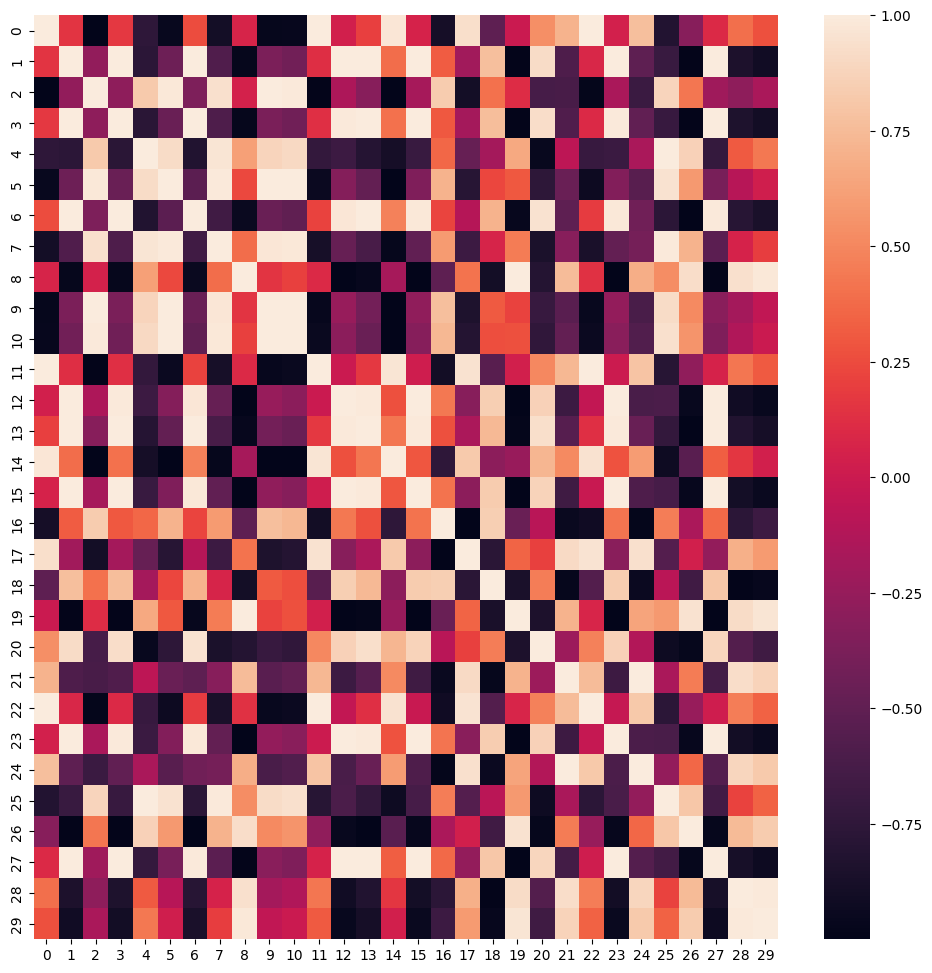

In [43]:
w_sim1 = cosine_similarity(reduced_texts, reduced_texts)
plt.figure(figsize=(12, 12))
sns.heatmap(w_sim1)

In [31]:

# different approach (not averaging the words per sentence)
text_arr = []

for list in texts:
    word_arr = []
    for word in list:
        word_arr.append(model.wv[word])
    text_arr.append(word_arr)

text_array = pad_sequences(text_arr, dtype = 'float64')
text_array.shape

(30, 14, 100)

In [33]:
text_ready = np.reshape(text_array, (30, -1))
text_ready.shape

(30, 1400)

In [34]:
text_ready_ = pca.fit_transform(text_ready)

In [35]:
text_ready_.shape

(30, 2)

<Axes: >

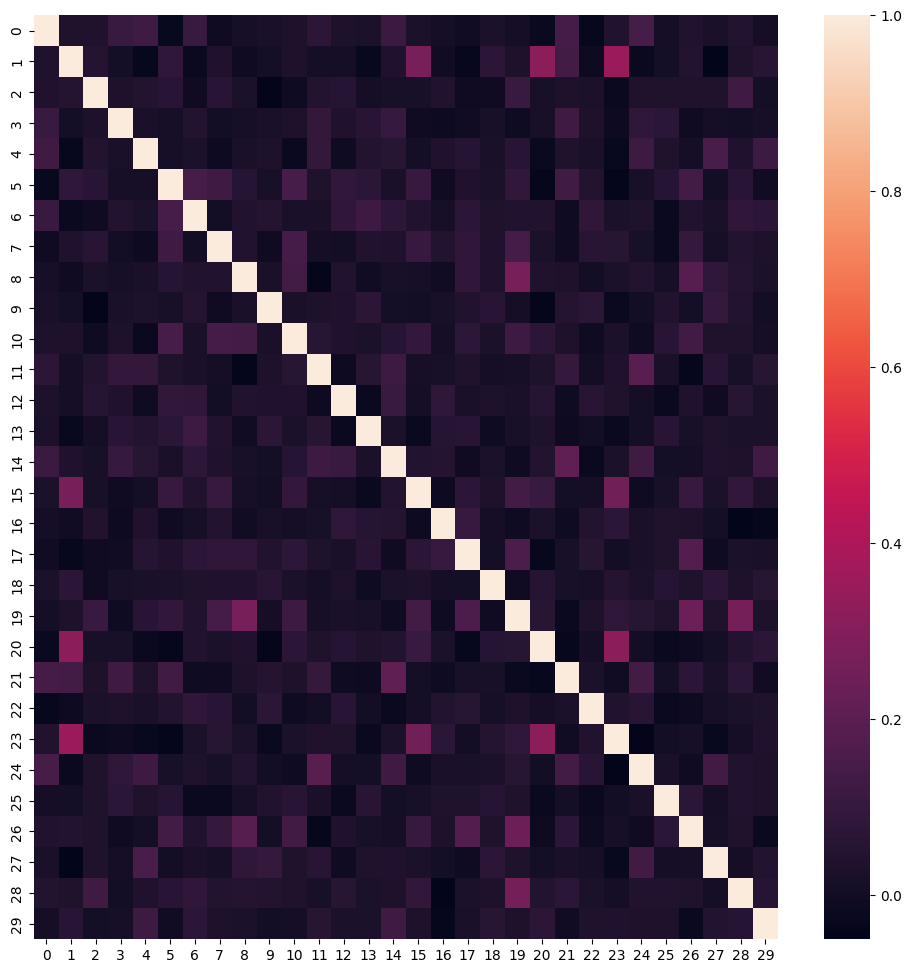

In [38]:
w_sim = sentence_model.similarity(text_ready, text_ready)
plt.figure(figsize=(12, 12))
sns.heatmap(w_sim)

## Kmeans Model

In [32]:
from sklearn.cluster import KMeans

In [219]:
kmeans = KMeans(n_clusters=3)
result = kmeans.fit_predict(reduced_texts)

kmeans2 = KMeans(n_clusters=3)
result2 = kmeans2.fit_predict(text_ready_)

In [221]:
result2

array([1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 1])

In [223]:
kmeans2.cluster_centers_

array([[ 0.02792756, -0.10142647],
       [-0.03283582,  0.00799063],
       [ 0.05991681,  0.03273431]])

In [79]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [78]:
silhouette_score(reduced_texts, kmeans.labels_)

-0.0671262663441454

In [226]:
silhouette_score(text_ready_, kmeans2.labels_)

0.573667415717993

<Axes: >

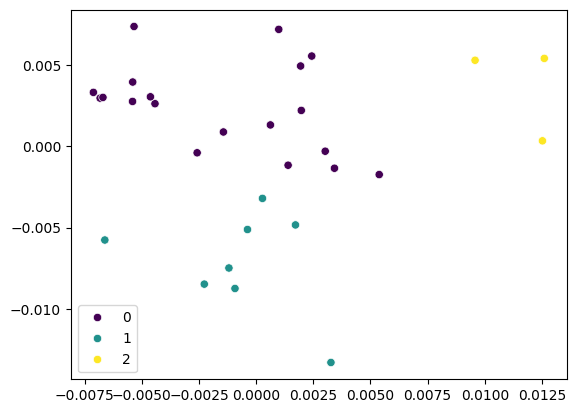

In [208]:
sns.scatterplot(x = reduced_texts[:, 0], y = reduced_texts[:, 1], hue=kmeans.labels_, palette='viridis')

<Axes: >

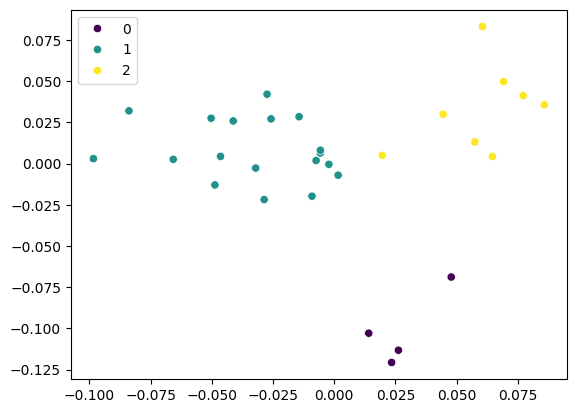

In [228]:
sns.scatterplot(x = text_ready_[:, 0], y = text_ready_[:, 1], hue=kmeans2.labels_, palette='viridis')

## Sentence Embeddings

In [58]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

C:\Users\Lenovo\anaconda3\envs\DL\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [59]:
#sentences = [Bio_list[2], Bio_list[3], Bio_list[29]]

embeddings = sentence_model.encode(Bio_list)

embeddings.shape

(30, 384)

In [60]:
pca_sen = PCA(n_components=2)
reduced_sen = pca_sen.fit_transform(embeddings)
reduced_sen.shape

(30, 2)

In [61]:
similarity = sentence_model.similarity(embeddings, embeddings)
pca_sim = sentence_model.similarity(reduced_sen, reduced_sen)

<Axes: >

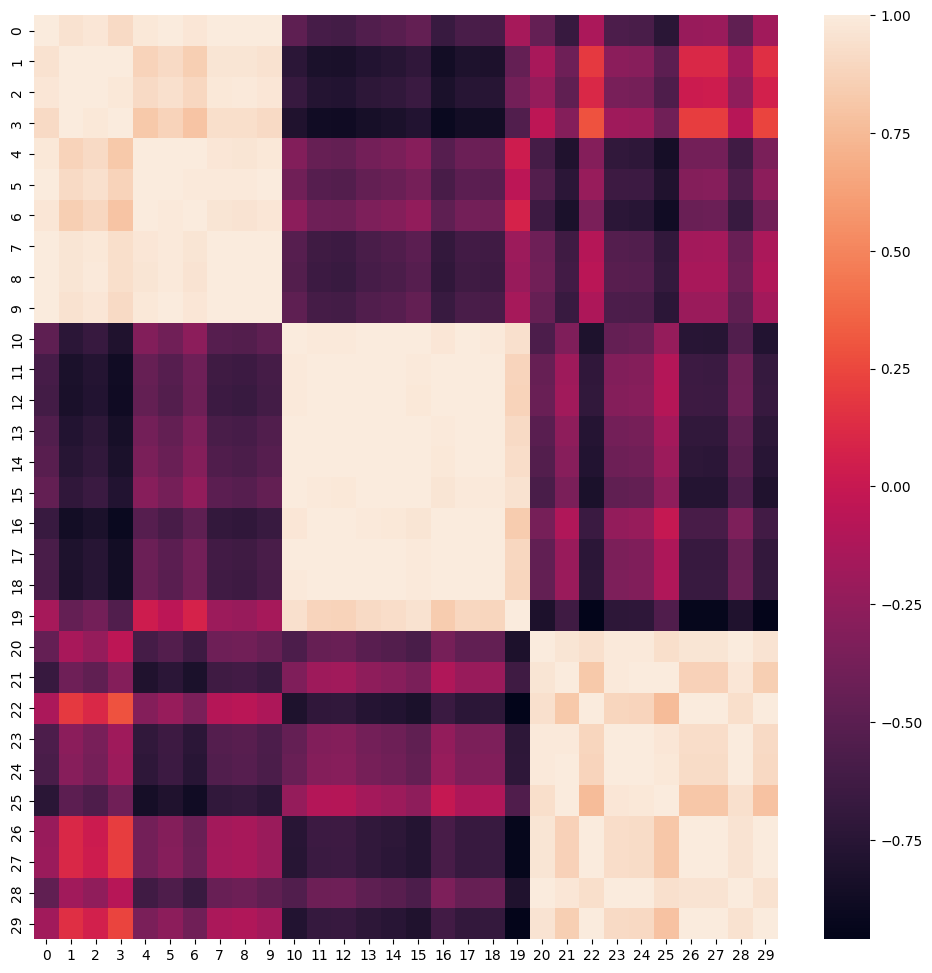

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.heatmap(pca_sim)

<Axes: >

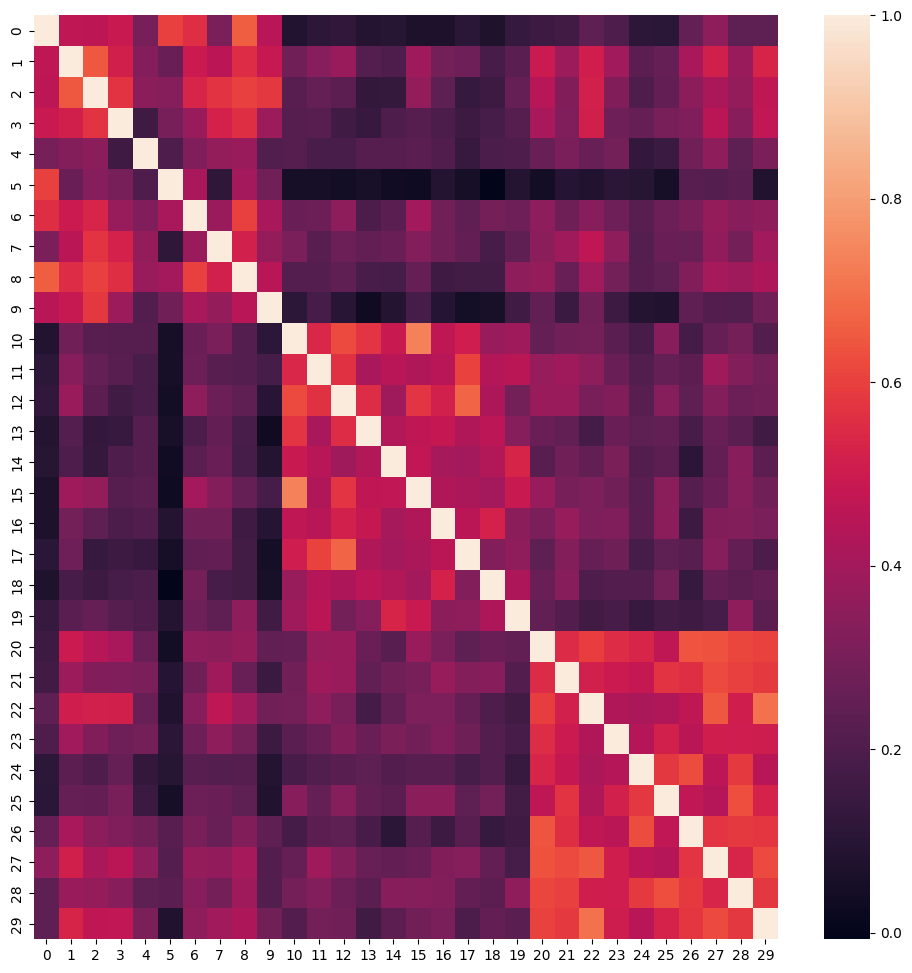

In [63]:
sen_sim = cosine_similarity(embeddings, embeddings)
plt.figure(figsize=(12, 12))
sns.heatmap(sen_sim)

In [81]:
kmeans = KMeans(n_clusters=3)
result2 = kmeans.fit_predict(embeddings)

print(result2)
print()

kmeans2 = KMeans(n_clusters=3)
result_pca = kmeans2.fit_predict(reduced_sen)
print(result_pca)

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]


In [82]:
print(silhouette_score(embeddings, kmeans.labels_))
print(silhouette_score(reduced_sen, kmeans2.labels_))

0.1473575
0.766465


In [83]:
print(calinski_harabasz_score(embeddings, kmeans.labels_))
print(calinski_harabasz_score(reduced_sen, kmeans2.labels_))

5.43506235811391
159.04382414168703


<Axes: >

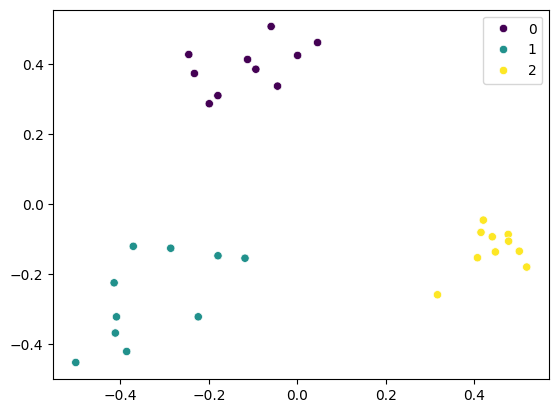

In [84]:
sns.scatterplot(x = reduced_sen[:, 0], y = reduced_sen[:, 1], hue=kmeans2.labels_, palette='viridis')

<Axes: >

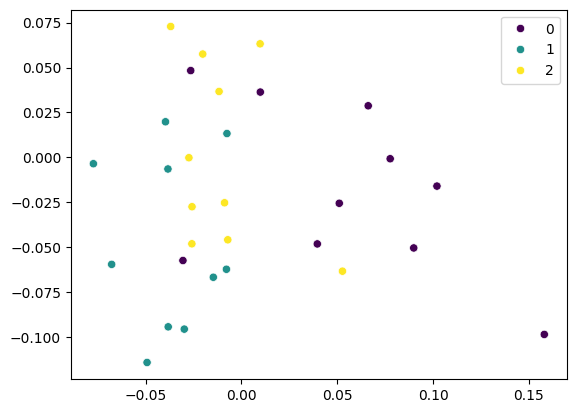

In [85]:
sns.scatterplot(x = embeddings[:, 0], y = embeddings[:, 1], hue=kmeans.labels_, palette='viridis')

## inference

In [86]:
new_sen = "I’m fascinated by blockchain technology and its potential to revolutionize decentralized applications."

sen_embed = sentence_model.encode(new_sen)

In [90]:
sen_reduced = pca_sen.transform(sen_embed.reshape(1, -1))
sen_reduced

array([[ 0.33092275, -0.10248435]], dtype=float32)

In [91]:
result_sen = kmeans2.predict(sen_reduced)
result_sen

array([2])

In [8]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")
result = sentiment_pipeline(["This location is not safe.", "This location is safe."])
print(result)  # Returns a label (positive/negative) and confidence score.

[{'label': 'NEGATIVE', 'score': 0.999774158000946}, {'label': 'POSITIVE', 'score': 0.9994753003120422}]


In [9]:
review_list = ["Sunny Grove Park is the perfect spot for a weekend picnic! The lush greenery and well-maintained paths make it a relaxing escape." ,
               "I love coming here for my morning runs. The fresh air and peaceful surroundings are just what I need to start my day.", "The children's playground is fantastic, and there are plenty of benches for parents to relax while keeping an eye on their kids.",
               "The park’s flower garden is beautiful in spring! It's a great place for photography enthusiasts.", "There’s plenty of space for outdoor yoga sessions and group activities. I always feel so energized after visiting!",
               "The birdwatching opportunities here are amazing. I’ve spotted several rare species while wandering through the trails.", "The park has a lovely lake where you can rent boats. My family and I had a great time rowing around!",
               "Great place for a quiet afternoon. I brought a book and sat by the pond for hours. Very calming.", "Sunny Grove is dog-friendly! My pup absolutely loves running around the wide-open spaces.", 
               "I came for a Sunday farmer’s market, and it was fantastic. Lots of local vendors and fresh produce!", "Sunny Grove has a lot of potential, but it needs better upkeep. Some areas are nice, but others are overgrown with weeds.",
               "The park is pretty, but there’s not much variety in terms of activities. Great for walking, but not much else.", "It’s a nice spot for a quick visit, but I wouldn’t recommend it if you’re looking for a full day out. Limited options for food or drinks.",
               "The flowers are beautiful, but the rest of the park feels a bit neglected. Could use more maintenance overall.", "Great for families with kids, but not ideal if you're looking for a quiet space. Lots of noise from the playground area.",
               "I enjoyed my visit, but the park really lacks shaded seating. After a while, I had to leave because it was too hot.", "Lovely views and a decent walking path, but the park doesn’t have enough trash cans, so litter is an issue in some areas.", 
               "The park is a good escape from the city, but there’s no wifi or food stands, so you need to bring everything with you.", "It’s a good place for a short jog, but I wish there were more water fountains along the path.",
               "Sunny Grove is nice, but a little too far from the city. It’s great if you live nearby, but I wouldn’t make a long trip just to visit.", "The park is beautiful, but the litter problem is getting out of control. It really detracts from the experience.",
               "I was disappointed by the lack of shaded areas. On hot days, it’s almost unbearable to stay for too long.", "The bathrooms are poorly maintained. They were dirty and lacked toilet paper when I visited.",
               "Parking can be a nightmare, especially on weekends. I had to park several blocks away just to get in.", "The park is too crowded during peak hours. It’s hard to enjoy a quiet walk with so many people around.",
               "The playground equipment looks old and rusty. Not very safe for kids in my opinion.", "I expected more from the lake, but it’s pretty dirty and full of algae. Definitely not suitable for swimming.",
               "The park closes too early! I wish it stayed open later for evening strolls during the summer.", "I got bitten by mosquitos all over. They need to do something about the bug problem.",
               "I found the park to be overrated. There’s not much to do besides walk around, and the facilities are subpar."]

In [10]:
results = sentiment_pipeline(review_list)
print(results)

[{'label': 'POSITIVE', 'score': 0.9998573064804077}, {'label': 'POSITIVE', 'score': 0.9996515512466431}, {'label': 'POSITIVE', 'score': 0.9998555183410645}, {'label': 'POSITIVE', 'score': 0.9998888969421387}, {'label': 'POSITIVE', 'score': 0.9989932179450989}, {'label': 'POSITIVE', 'score': 0.9998422861099243}, {'label': 'POSITIVE', 'score': 0.9998376369476318}, {'label': 'POSITIVE', 'score': 0.9994763731956482}, {'label': 'POSITIVE', 'score': 0.9993112087249756}, {'label': 'POSITIVE', 'score': 0.9998742341995239}, {'label': 'NEGATIVE', 'score': 0.9956027269363403}, {'label': 'NEGATIVE', 'score': 0.9957206845283508}, {'label': 'NEGATIVE', 'score': 0.7127578258514404}, {'label': 'NEGATIVE', 'score': 0.9994495511054993}, {'label': 'NEGATIVE', 'score': 0.9911521077156067}, {'label': 'NEGATIVE', 'score': 0.9995075464248657}, {'label': 'NEGATIVE', 'score': 0.8857139945030212}, {'label': 'POSITIVE', 'score': 0.9539268016815186}, {'label': 'NEGATIVE', 'score': 0.9874404668807983}, {'label': '

In [11]:
review_dict = {review_list[i]:results[i]['label'] for i in range(len(review_list))}
review_dict

{'Sunny Grove Park is the perfect spot for a weekend picnic! The lush greenery and well-maintained paths make it a relaxing escape.': 'POSITIVE',
 'I love coming here for my morning runs. The fresh air and peaceful surroundings are just what I need to start my day.': 'POSITIVE',
 "The children's playground is fantastic, and there are plenty of benches for parents to relax while keeping an eye on their kids.": 'POSITIVE',
 "The park’s flower garden is beautiful in spring! It's a great place for photography enthusiasts.": 'POSITIVE',
 'There’s plenty of space for outdoor yoga sessions and group activities. I always feel so energized after visiting!': 'POSITIVE',
 'The birdwatching opportunities here are amazing. I’ve spotted several rare species while wandering through the trails.': 'POSITIVE',
 'The park has a lovely lake where you can rent boats. My family and I had a great time rowing around!': 'POSITIVE',
 'Great place for a quiet afternoon. I brought a book and sat by the pond for h

In [22]:
np.unique(np.array(list(review_dict.values())), return_counts=True)

(array(['NEGATIVE', 'POSITIVE'], dtype='<U8'), array([18, 12], dtype=int64))

In [28]:
np.unique(np.array(['positive', 'positive', 'negative', 'positive']), return_counts=True)

(array(['negative', 'positive'], dtype='<U8'), array([1, 3], dtype=int64))